# Hysteresis in River Systems
Hysteresis is a condition where a dependent variable is controlled not only by the ***value*** of an independent variable, but also by its ***direction***. For example, streams carry a higher sediment load when a flood is receding than when it is rising. In some cases, this hysteresis may be caused by a lag, where the dependent variable responds to the independent variable after a short wait. This may be the case with sediment load, where it takes longer for sediment to move downstream than water, but it may also be due to some sort of non-linear process. For example, stream banks may be stable when flood waters are rising, but they become saturated and then collapse as the discharge and the water levels decrease.

Let's illustrate these ideas with some data!

In [1]:
import hydrofunctions as hf
print(hf.__version__)
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-notebook')
%matplotlib inline

0.2.1


## Hystersis in flood waves

First, let's compare a flood wave that travels downstream from one stream gauge to another with little change. We'll use two gauges along the West Branch of the Susquehanna: Karthaus (upstream) and Williamsport (downstream).

In [2]:
Karthaus = '01542500'
Williamsport = '01551500'
request1 = hf.NWIS([Karthaus, Williamsport], 'iv', start_date='2016-02-03', end_date='2016-02-10')

Requested data from https://nwis.waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=01542500%2C01551500&startDT=2016-02-03&endDT=2016-02-10


When we plot the discharge data over time, the flood wave at Williamsport looks similar to how it looked upstream at Karthaus a day earlier. The only difference is that the discharge is higher and the lag. It took about 21 hours for this flood to travel the 200 km between the two sites.

<AxesSubplot:xlabel='Time', ylabel='Discharge (cfs)'>

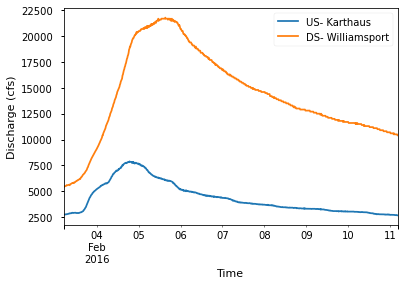

In [3]:
flood_data = request1.df('q').copy()
flood_data.rename(columns={'USGS:01542500:00060:00000':'US- Karthaus', 'USGS:01551500:00060:00000': 'DS- Williamsport'}, inplace=True)
flood_data.plot(xlabel='Time', ylabel='Discharge (cfs)')

Now that we've seen the discharge data plotted over time, let's plot the discharge at each site against each other. In this case, I've plotted the upstream discharge at Karthaus on the X axis, and the downstream discharge at Williamsport on the Y axis. I've placed a small 'x' on the first measurement and a triangle on the last measurement so you can tell where the series began and ended.

Text(0, 0.5, 'Downstream Discharge (cfs)')

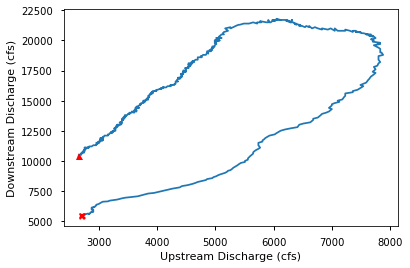

In [4]:
fig, ax = plt.subplots()
x = flood_data.loc[:,'US- Karthaus'].values
y = flood_data.loc[:,'DS- Williamsport'].values
ax.plot(x,y)
ax.plot(x[0], y[0], 'rX') # plot an 'X' at the beginning
ax.plot(x[-1], y[-1], 'r^') # plot a triangle at the end
ax.set_xlabel('Upstream Discharge (cfs)')
ax.set_ylabel('Downstream Discharge (cfs)')

In the graph above, the values move counter-clockwise. It moves this way because the X-axis (the upstream site) increases before the Y-axis (the downstream site) due to the lag between sites. This is hysteresis! If you had plotted all of the points without paying attention to their order, the relationship between the the variables would have been much less clear!

## Hysteresis in sediment load

Our next example of hysteresis occurs in the relationship between discharge and sediment load.

In [5]:
# To find sites that collect sediment load data, use a query like this:
# sus_sed_sites = hf.NWIS(stateCd='PA', parameterCd='80155')
# More information on sediment data: https://cida.usgs.gov/sediment/helpGuide.jsp
# To determine the dates that sediment load was collected at a site, use:
# https://waterdata.usgs.gov/nwis/inventory/?site_no=01545500&agency_cd=USGS

In [6]:
# We'll request data from another site along the West Branch of the Susquehanna at Renovo, PA.
renovo = hf.NWIS('01545500', 'dv', start_date='1967-01-26', end_date='1968-09-28')
renovo

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=01545500&startDT=1967-01-26&endDT=1968-09-28


USGS:01545500: West Branch Susquehanna River at Renovo, PA
    00060: <Day>  Discharge, cubic feet per second 
    80154: <Day>  Suspended sediment concentration, milligrams per liter 
    80155: <Day>  Suspended sediment discharge, short tons per day 
Start: 1967-01-26 00:00:00+00:00
End:   1968-09-28 00:00:00+00:00

Now, let's plot the daily discharge and daily sediment load for a single flood in 1967.

<AxesSubplot:label='00838a01-1f7a-45bb-919c-75695da3ef73'>

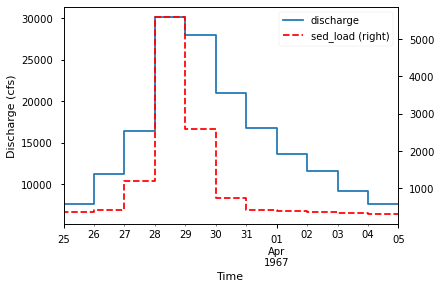

In [7]:
may = renovo.df('q', '80155').loc['1967-03-25':'1967-04-05']
may.rename(columns={'USGS:01545500:00060:00003':'discharge', 'USGS:01545500:80155:00003':'sed_load'}, inplace=True)
may['discharge'].plot(drawstyle='steps', xlabel='Time', ylabel='Discharge (cfs)', legend=True)
may['sed_load'].plot(secondary_y=True, drawstyle='steps', xlabel='Time', style='r--', legend=True)

With our two variables plotted on the same time axis, it is possible to see that they peak on the same day, but sediment load increases and decreases faster than discharge does. Let's see how that looks when we plot the variables against each other instead of over time.

In this graph, I've plotted discharge on the X axis, and sediment load on the Y axis. There is an 'X' at the start of the time series, and a triangle at the end.

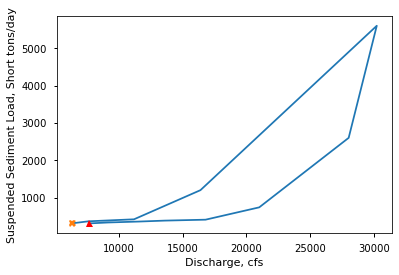

In [8]:
Q = may.loc[:,'discharge'].values
load = may.loc[:,'sed_load'].values
fig, ax = plt.subplots()
plt.xlabel('Discharge, cfs')
plt.ylabel('Suspended Sediment Load, Short tons/day')
ax.plot(Q,load)
ax.plot(Q[0], load[0], 'X') # Plot an X at the first value in each series.
ax.plot(Q[-1], load[-1], 'r^') # plot a triangle at the end

In this case, the hysteresis moves clockwise, contrary to our hypothesis at the top of the page! Is this pattern common? Do the daily mean values hide lags that might otherwise be seen in more frequently sampled data? Or perhaps large rivers behave differently than smaller streams?

Use these techniques to explore a little and let us know what you find out!